In [5]:
# import libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')


In [6]:
# loading the datas
customer = pd.read_csv('data/user_purchase_data.csv')
products = pd.read_csv('data/products.csv')
### Cleaning and joining the data
#check customers data
customer.head()

,user_id,product_id,user_rating
0,1,44,2.1
1,1,30,2.1
2,1,50,1.6
3,1,4,4.6
4,1,3,2.0


In [7]:
#check products datas
products.head()

,Product_ID,name,main_category,sub_category,ratings,no_of_ratings,PRICE
0,1,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...",Electronics,Electronic Gadgets,4.0,965,AUD 358.47
1,2,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...",Electronics,Electronic Gadgets,4.3,226,AUD 377.34
2,3,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,Electronics,Electronic Gadgets,4.2,54,AUD 43.38
3,4,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...",Electronics,Electronic Gadgets,4.1,701,AUD 471.68
4,5,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",Electronics,Electronic Gadgets,4.3,945,AUD 377.34


In [8]:
#join the two data sets
df = pd.merge(customer,products,left_on='product_id',right_on='Product_ID',how='left')
df.head()


,user_id,product_id,user_rating,Product_ID,name,main_category,sub_category,ratings,no_of_ratings,PRICE
0,1,44,2.1,44,"Samsung Galaxy M04 Light Green, 4GB RAM, 64GB ...",Electronics,Electronic Gadgets,4.0,703,AUD 226.40
1,1,30,2.1,30,Hammer Ace 3.0 Bluetooth Calling Smart Watch w...,Electronics,Electronic Gadgets,3.9,844,AUD 94.32
2,1,50,1.6,50,"Redmi 10A (Slate Grey, 4GB RAM, 64GB Storage) ...",Electronics,Electronic Gadgets,4.0,254,AUD 226.40
3,1,4,4.6,4,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...",Electronics,Electronic Gadgets,4.1,701,AUD 471.68
4,1,3,2.0,3,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,Electronics,Electronic Gadgets,4.2,54,AUD 43.38


In [9]:
# data distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,86465.0,5996.300584,3463.975651,1.0,2995.0,5993.0,8996.0,12000.0
product_id,86465.0,25.561117,14.416922,1.0,13.0,26.0,38.0,50.0
user_rating,86465.0,3.004235,1.153766,1.0,2.0,3.0,4.0,5.0
Product_ID,86465.0,25.561117,14.416922,1.0,13.0,26.0,38.0,50.0
ratings,86465.0,4.034567,0.397229,2.5,4.0,4.1,4.3,4.6
no_of_ratings,86465.0,526.301290,283.258477,8.0,287.0,539.0,765.0,965.0


In [10]:
# check number of rows and columns , data types, contains null or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86465 entries, 0 to 86464
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        86465 non-null  int64  
 1   product_id     86465 non-null  int64  
 2   user_rating    86465 non-null  float64
 3   Product_ID     86465 non-null  int64  
 4   name           86465 non-null  object 
 5   main_category  86465 non-null  object 
 6   sub_category   86465 non-null  object 
 7   ratings        86465 non-null  float64
 8   no_of_ratings  86465 non-null  int64  
 9   PRICE          86465 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 6.6+ MB


In [11]:
#check duplication
df.duplicated().sum()

0

In [12]:
# check if there are from multiple categories and sub-categories
df.groupby(['main_category','sub_category']).count()

,,user_id,product_id,user_rating,Product_ID,name,ratings,no_of_ratings,PRICE
main_category,sub_category,,,,,,,,
Electronics,Electronic Gadgets,86465,86465,86465,86465,86465,86465,86465,86465


- note: It seems the data contians only from sub-category 'Electronic Gadgets'. we might have to use a different approches here to solve our problem.

#### cleaning process

In [13]:
# drop the 'Poduct_ID', since we need only one
# drop main_category and sub_category since all the datas from from one category
df = df.drop(['Product_ID','main_category', 'sub_category'],axis=1)
# rename the columns to make it clean
df.rename(columns={'user_id':'userId', 'product_id':'productId', 'user_rating':'userRating', 'name':'productName', \
    'ratings':'productRating', 'no_of_ratings':'noOfRatings', 'PRICE':'price'}, inplace=True)

In [14]:
# remove AUD from price
# convert into numberic values 
# then to USD dolalar (1AUD = .65 USD)
df['price']= pd.to_numeric(df['price'].str.replace('AUD','')) *.65

In [15]:
df.sample(5)

,userId,productId,userRating,productName,productRating,noOfRatings,price
57065,7918,37,2.0,"OnePlus 11R 5G (Galactic Silver, 8GB RAM, 128G...",4.6,338,490.5550
72677,10077,37,2.5,"OnePlus 11R 5G (Galactic Silver, 8GB RAM, 128G...",4.6,338,490.5550
74543,10339,47,1.7,boAt Bassheads 220 Wired in Ear Earphones(Blac...,4.1,742,12.2525
39192,5429,22,2.5,"Redmi A1 (Black, 2GB RAM, 32GB Storage) | Segm...",4.0,535,110.3635
4418,613,41,3.5,pTron Bassbuds Duo in Ear Earbuds with 32Hrs T...,3.5,737,31.8760


## Exploratory Data Analysis

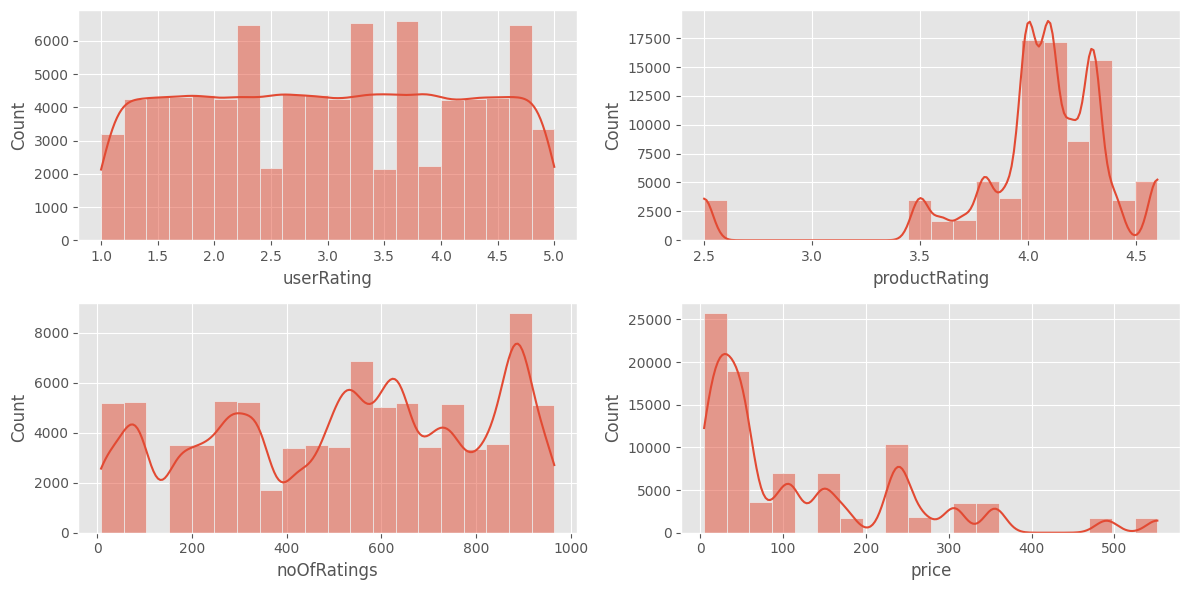

In [16]:
# Explore the distribution of numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(['userRating', 'productRating', 'noOfRatings', 'price']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=20, kde=True)
plt.tight_layout()
plt.show()

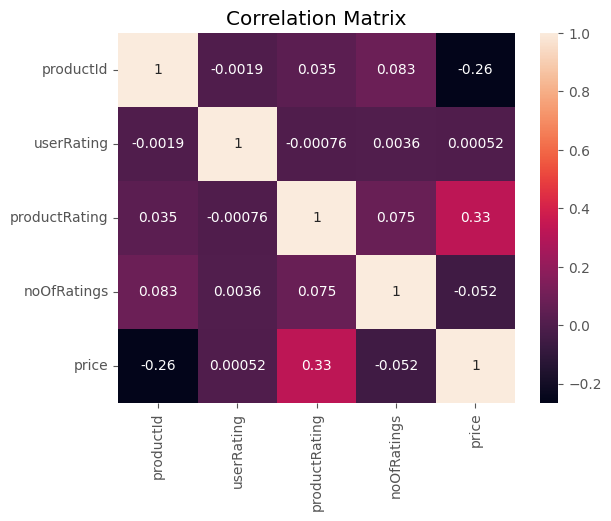

In [17]:
#Select only numeric columns 
numerical_features = ['productId', 'userRating', 'productRating','noOfRatings', 'price']

#Inferential statistics
correlation_matrix = df[numerical_features].corr()
#Data relationships - Data visualization
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

- There is a weak positive correlation (0.327) between productRating and price.

### Since I dont see any high correlation and i'll only focus more on Products and given user Ratings

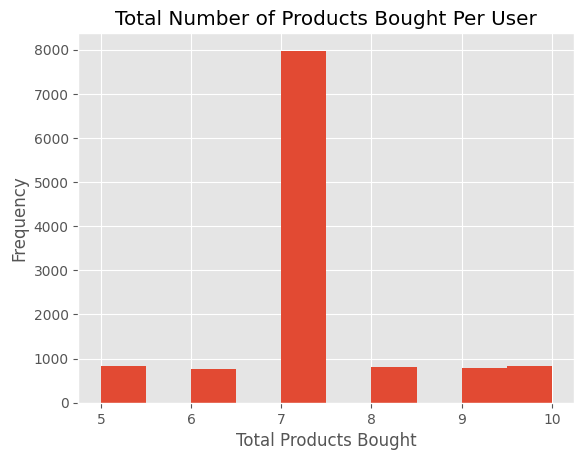

In [18]:
#Total number of products each user bought
user_product_count = df.groupby('userId')['productId'].count()

# Plot the distribution
plt.hist(user_product_count)
plt.title('Total Number of Products Bought Per User')
plt.xlabel('Total Products Bought')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Find products bought min, max, mean
user_product_count.agg(['min','max','mean'])

min      5.000000
max     10.000000
mean     7.205417
Name: productId, dtype: float64

- Most of user have bought atleast 5 products, max is 10 products and average of 7 products

Text(0, 0.5, 'Frequency')

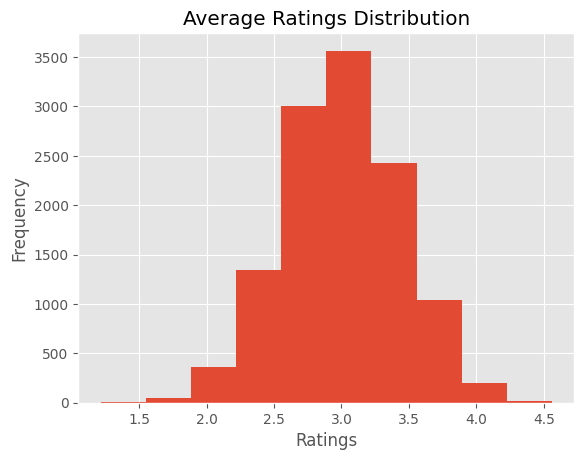

In [20]:
df.groupby('userId')['userRating'].mean().hist()
plt.title('Average Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

In [21]:
# Find products given ratigns:  min, max, mean
df.groupby('userId')['userRating'].mean().agg(['min','max','mean'])

min     1.216667
max     4.560000
mean    3.004395
Name: userRating, dtype: float64

- Most of user gave 3.0 ratings, max is 4.56 and min of 1.2

In [22]:
#Top most bought products.
df.groupby(['productName'])['productId'].count().sort_values(ascending=False).head()

productName
OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Drivers, 10 Mins Charge - 20 Hrs...    5089
boAt Airdopes 141 Bluetooth Truly Wireless in Ear Earbuds with 42H Playtime, Beast Mode(Low Latency Upto 80ms) for Gaming,...    3547
boAt Rockerz 255 Pro+ in-Ear Bluetooth Neckband with Upto 40 Hours Playback, ASAP Charge, IPX7, Dual Pairing, BT v5.0, wi...    3412
Hammer Ace 3.0 Bluetooth Calling Smart Watch with Largest 1.85" IPS Display, Dual Mode, Spo2, Heart Rate, Strong Metallic ...    1824
Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus | Travel Adapter...    1796
Name: productId, dtype: int64

In [23]:
#Top most products by ratings
df.groupby('productName')['userRating'].mean().sort_values(ascending=False).head()

productName
Samsung Galaxy M04 Light Green, 4GB RAM, 64GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 | 5000 mAh Battery       3.094097
Apple 20W USB-C Power Adapter (for iPhone, iPad & AirPods)                                                                       3.056964
Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus | Travel Adapte...    3.051130
Redmi 10A (Charcoal Black, 4GB RAM, 64GB Storage) | 2 Ghz Octa Core Helio G25 | 5000 mAh Battery | Finger Print Sensor | U...    3.039989
iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RAM, 128GB Storage) | World's First Snapdragon 4 Gen 1 | 120Hz Refresh Rate | ...    3.037867
Name: userRating, dtype: float64

## Modelling 

### Applying the Collaborative filtering process

In [24]:
# Convering data into matrix via pivot
df_matrix= df.pivot_table(index='userId',columns='productName',values='userRating',fill_value=0)
df_matrix.head()

productName,"Apple 20W USB-C Power Adapter (for iPhone, iPad & AirPods)","Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Ratin...","Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240 * 240 PX High Res with SpO2, Heart Rate ...","Hammer Ace 3.0 Bluetooth Calling Smart Watch with Largest 1.85"" IPS Display, Dual Mode, Spo2, Heart Rate, Strong Metallic ...",Lapster 5-in-1 Multi-Function Laptop Cleaning Brush/Keyboard Cleaning kit/Gadget Cleaning kit Gap Duster Key-Cap Puller fo...,MI Power Bank 3i 20000mAh Lithium Polymer 18W Fast Power Delivery Charging | Input- Type C | Micro USB| Triple Output | Sa...,"OnePlus 11R 5G (Galactic Silver, 16GB RAM, 256GB Storage)","OnePlus 11R 5G (Galactic Silver, 8GB RAM, 128GB Storage)","OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Drivers, 10 Mins Charge - 20 Hrs...","OnePlus Nord 2T 5G (Gray Shadow, 8GB RAM, 128GB Storage)",...,boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black),boAt Bassheads 220 Wired in Ear Earphones(Black Indi),"boAt Rockerz 255 Pro+ in-Ear Bluetooth Neckband with Upto 40 Hours Playback, ASAP Charge, IPX7, Dual Pairing, BT v5.0, wi...","boAt Rockerz 330 Bluetooth Wireless in Ear Earphones with mic, Upto 30 Hours Playtime, ASAP Charge, Signature Sound, Dual ...","boAt Rockerz 450 Bluetooth On Ear Headphones with Mic, Upto 15 Hours Playback, 40MM Drivers, Padded Ear Cushions, Integrat...","boAt Wave Call Smart Watch, Smart Talk with Advanced Dedicated Bluetooth Calling Chip, 1.69 HD Display with 550 NITS & 70%...","iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RAM, 128GB Storage) | World's First Snapdragon 4 Gen 1 | 120Hz Refresh Rate | ...","pTron Bassbuds Duo in Ear Earbuds with 32Hrs Total Playtime, Bluetooth 5.1 Wireless, Stereo Audio, Touch Control TWS, with...","realme narzo 50A Prime (Flash Black, 4GB RAM+64GB Storage) Full High Definition+ Display |50MP AI Triple Camera| Charger I...","realme narzo 50A Prime (Flash Blue, 4GB RAM+128GB Storage) FHD+ Display | 50MP AI Triple Camera| Charger Included"
userId,,,,,,,,,,,,,,,,,,,,,
1,2.2,0.0,0.0,2.1,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,3.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.6,0.0,0.0,0.0
3,4.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,3.5
4,4.2,0.0,0.0,0.0,2.8,0.0,0.0,0.0,1.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9,3.8,0.0,...,0.0,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0,0.0


### Applying cosine_similarity 

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate product similarity matrix
product_similarity_df = pd.DataFrame(cosine_similarity(df_matrix.T), index=df_matrix.columns, columns=df_matrix.columns)

# Function to recommend products to a user
def recommend_products(user_id, n=5):
    user_ratings = df_matrix.loc[user_id] # Filter for user's ratings
    # Calculate the weighted average of similar products >Sort the recommendations in descending order> Exclude products already rated by the user
    recommendations = product_similarity_df.dot(user_ratings).sort_values(ascending=False).drop(df[df['userId'] == user_id]['productName'], errors='ignore')
    return recommendations.head(n) #Get the top n recommendations

In [26]:
# 1 Example: Recommend products to user with userId = 123
user_id = 123
recommendations = recommend_products(user_id)
print(recommendations)

productName
OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Drivers, 10 Mins Charge - 20 Hrs...    4.432600
boAt Airdopes 141 Bluetooth Truly Wireless in Ear Earbuds with 42H Playtime, Beast Mode(Low Latency Upto 80ms) for Gaming,...    3.899365
boAt Rockerz 255 Pro+ in-Ear Bluetooth Neckband with Upto 40 Hours Playback, ASAP Charge, IPX7, Dual Pairing, BT v5.0, wi...    3.742662
Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus | Travel Adapte...    2.927478
Hammer Ace 3.0 Bluetooth Calling Smart Watch with Largest 1.85" IPS Display, Dual Mode, Spo2, Heart Rate, Strong Metallic ...    2.846701
dtype: float64


In [27]:
# 2 Example : Recommend products to user with userId = 200
user_id = 200
recommendations = recommend_products(user_id)
print(recommendations)

productName
boAt Rockerz 255 Pro+ in-Ear Bluetooth Neckband with Upto 40 Hours Playback, ASAP Charge, IPX7, Dual Pairing, BT v5.0, wi...    2.058791
boAt Airdopes 141 Bluetooth Truly Wireless in Ear Earbuds with 42H Playtime, Beast Mode(Low Latency Upto 80ms) for Gaming,...    2.027392
Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus | Travel Adapter...    1.601247
iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RAM, 128GB Storage) | World's First Snapdragon 4 Gen 1 | 120Hz Refresh Rate | ...    1.571855
Redmi 10 Power (Sporty Orange, 8GB RAM, 128GB Storage)                                                                           1.560885
dtype: float64
